# Classification of Stars, Galaxies and Quasars
Sloan Digital Sky Survey DR17

Analysis by: Sulchan Yoon

Class: Data430 University of Maryland Global Campus

### Review of the dataset

This data has been provided by the Sloan Digital Sky Survey's 4th phase (SDSS-IV). The information presented will be based on the Data Release 17 published in 2022 as the final data release. The data has also been peer reviewed and reduced to 100,000 observations for Kaggle use. The main extractions come from the Mapping Nearby Galaxies at Apache Point Observatory survey, bringing in over 10,000 nearby galaxy observations. Data from the DR17 also includes all information from the prior releases and includes information from Apache Point Observatory Galactic Evolution Experiment 2 survey pulling in 650,000 star readings.

Astronomy and Space has been a major topic in recent years with SpaceX bringing exploration much more into the public domain. Observations through a variety of tools and instruments has allowed individuals to classify stars based on their spectral characteristics. With the data gathered through these tools, data scientists, and astronomers have been able to group galaxies into a variety of classifications, allowing us to find those that may be similar to the Milky Way that we are in. Galaxies and star clusters such as the popular Andromeda Galaxy and Pleiades Star Cluster have been those that came about these classification methods.

### The Data

| Column Number | Column Heading | Definition                                      |
|---------------|----------------|-------------------------------------------------|
| 1             | obj_ID         | Object Identifier                               |
| 2             | alpha          | Right Ascension Angle at J2000 epoch            |
| 3             | delta          | Declination Angle at J2000 epoch                |
| 4             | u              | Ultraviolet Filter                              |
| 5             | g              | Green Filter                                    |
| 6             | r              | Red Filter                                      |
| 7             | i              | Near Infrared                                   |
| 8             | z              | Infrared Filter                                 |
| 9             | run_ID         | Run Number for specific scan                    |
| 10            | rerun_ID       | Rerun Number on image processing                |
| 11            | cam_col        | Camera scanline                                 |
| 12            | field_ID       | Field Number                                    |
| 13            | spec_obj_ID    | Unique ID for optical spectroscopic objects     |
| 14            | class          | Object Class                                    |
| 15            | redshift       | Redshift Value on the increase in wavelength    |
| 16            | plate          | Plate ID in SDSS                                |
| 17            | MJD            | Modified Julian Date                            |
| 18            | fiber_ID       | Fiber that pointed the light at the focal plane |

### Our Goal

The purpose of this report is to analyze the given information to find trends of the information as part of exploratory data analysis. We will then go deeper into the data and attempt to produce a viable machine learning algorithm to predict class types. Our first attempt will be through Logistic Regression, and compare that to other methods such as decision trees, and Bayesian Classifications.

Overall our purpose is to use these data elements in a way to find high value machine learning techniques to support astronomical research.


### The Initialization

In [131]:
# Import all necessary packages. I will separate out those used in part 1 and part 1b for purposes of class.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# This will be for 1b
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as classReport
from yellowbrick.classifier import ConfusionMatrix as CM
from sklearn.metrics import precision_recall_fscore_support as score

In [132]:
# Dataset has been retreived from Kaggle as a sampling of the total dataset in CSV format.
df = pd.read_csv("star_classification.csv")

### Exploratory Data Analysis

To begin our process, we will review the types of data we have been provided. Again, our data is sampled down to 100,000 observations of 18 different columns. Not all values will be used in our final product.

In [133]:
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

This quick review of information allows us to find that the class field is the only object type in the dataset. This will be the value we will be dependent variable. We will then review all other values and their assumed usefulness as part of the indepedent variable set.

In [135]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
obj_ID,100000.0,1.237665e+18,8.438560e+12,1.237646e+18,1.237659e+18,1.237663e+18,1.237668e+18,1.237681e+18
alpha,100000.0,1.776291e+02,9.650224e+01,5.527828e-03,1.275182e+02,1.809007e+02,2.338950e+02,3.599998e+02
delta,100000.0,2.413530e+01,1.964467e+01,-1.878533e+01,5.146771e+00,2.364592e+01,3.990155e+01,8.300052e+01
u,100000.0,2.198047e+01,3.176929e+01,-9.999000e+03,2.035235e+01,2.217914e+01,2.368744e+01,3.278139e+01
g,100000.0,2.053139e+01,3.175029e+01,-9.999000e+03,1.896523e+01,2.109983e+01,2.212377e+01,3.160224e+01
r,100000.0,1.964576e+01,1.854760e+00,9.822070e+00,1.813583e+01,2.012529e+01,2.104478e+01,2.957186e+01
i,100000.0,1.908485e+01,1.757895e+00,9.469903e+00,1.773228e+01,1.940514e+01,2.039650e+01,3.214147e+01
z,100000.0,1.866881e+01,3.172815e+01,-9.999000e+03,1.746068e+01,1.900460e+01,1.992112e+01,2.938374e+01
run_ID,100000.0,4.481366e+03,1.964765e+03,1.090000e+02,3.187000e+03,4.188000e+03,5.326000e+03,8.162000e+03
rerun_ID,100000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [136]:
df = df.drop(["obj_ID"],axis=1)
df = df.drop("run_ID",axis=1)
df = df.drop("rerun_ID",axis=1)
df = df.drop("field_ID",axis=1)
df = df.drop("spec_obj_ID",axis=1)
df = df.drop("fiber_ID",axis=1)
df = df.drop("cam_col",axis=1)

After our initial review, we will start our dataset by removing those labeled as an ID of some kind. This is an initial assumption on their useful life as compared to the rest of the dataset.

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alpha     100000 non-null  float64
 1   delta     100000 non-null  float64
 2   u         100000 non-null  float64
 3   g         100000 non-null  float64
 4   r         100000 non-null  float64
 5   i         100000 non-null  float64
 6   z         100000 non-null  float64
 7   class     100000 non-null  object 
 8   redshift  100000 non-null  float64
 9   plate     100000 non-null  int64  
 10  MJD       100000 non-null  int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 8.4+ MB


After our clean up, we are left with 11 variables we will use as part of analysis.

In [138]:
df["class"].dtype

dtype('O')

In [139]:
df.isnull().sum()

alpha       0
delta       0
u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
plate       0
MJD         0
dtype: int64

In [140]:
print("Number of unique Class of Types", len(df["class"].unique()))

Number of unique Class of Types 3


In [141]:
def plotkde(column):
    sns.kdeplot(data=df, x=column, hue="class", fill=True, common_norm=False, alpha=0.4)
    plt.show();

def plotkdelog(column):
    df2 = df.copy()
    df2[column] = np.log(df2[column])
    sns.kdeplot(data=df2, x=column, hue="class", fill = True, common_norm=False, alpha = 0.4)
    plt.show();

To simplify our initial review of the remaining datavalues, we create two sets of functions. The first plotkde will use a kernal density estimation of our base values. For graphs with extreme values, we apply a log to simplify the visualization through plotkdelog.

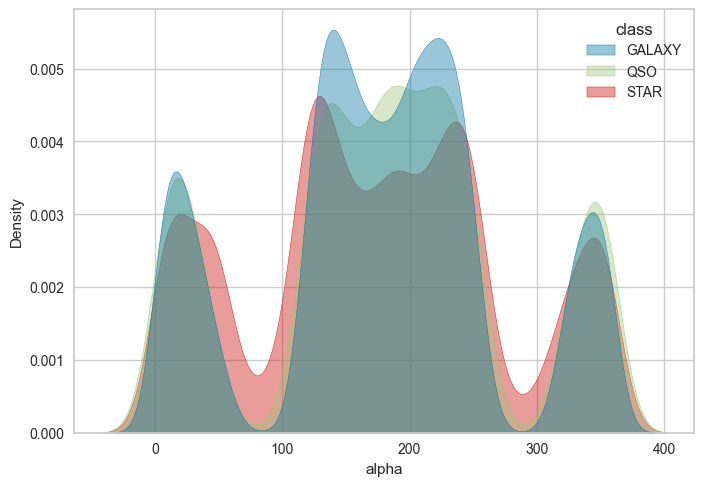

In [142]:
plotkde("alpha")

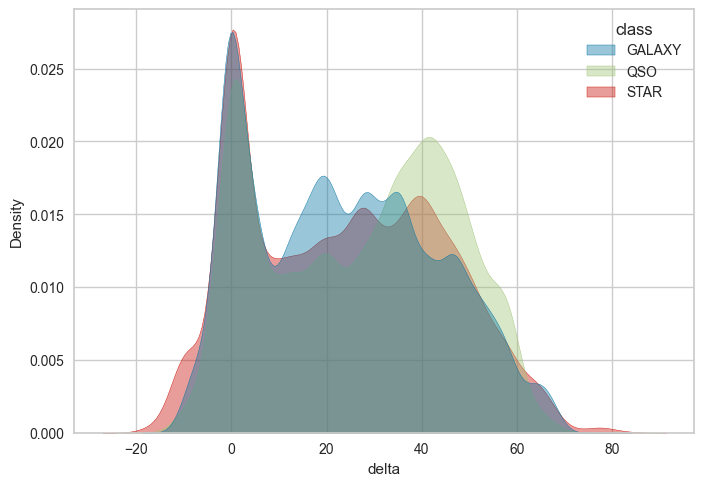

In [143]:
plotkde("delta")

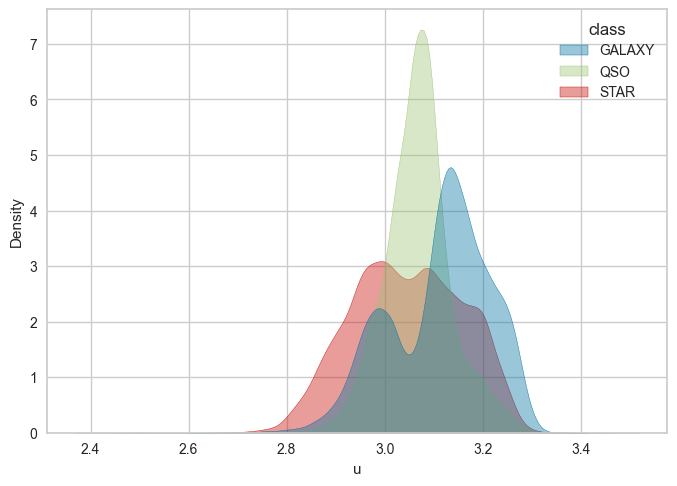

In [144]:
plotkdelog("u")

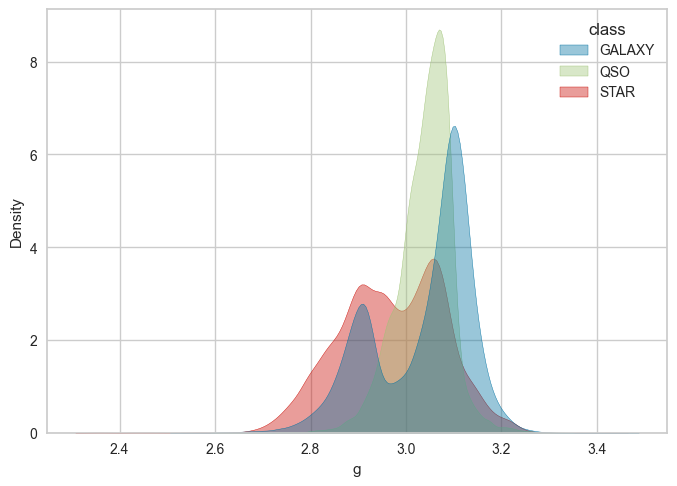

In [145]:
plotkdelog("g")

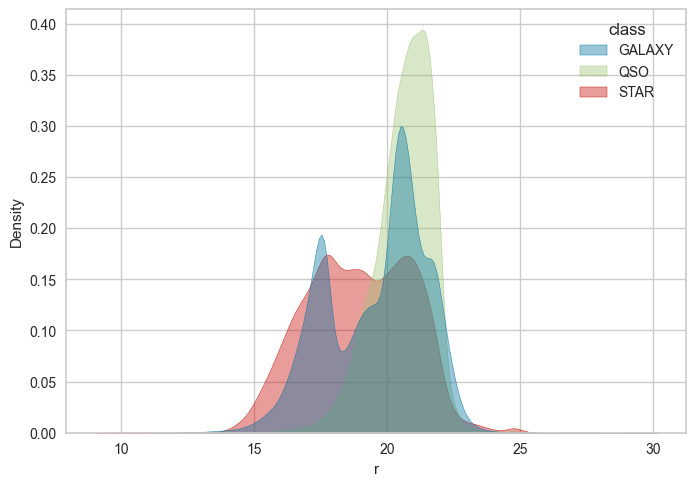

In [146]:
plotkde("r")

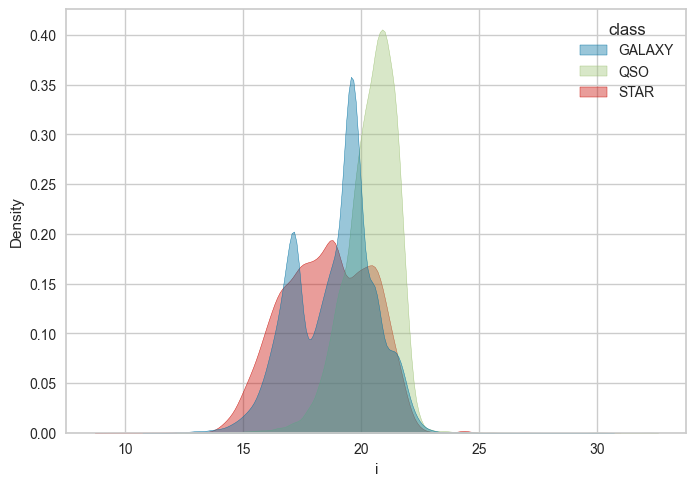

In [147]:
plotkde("i")

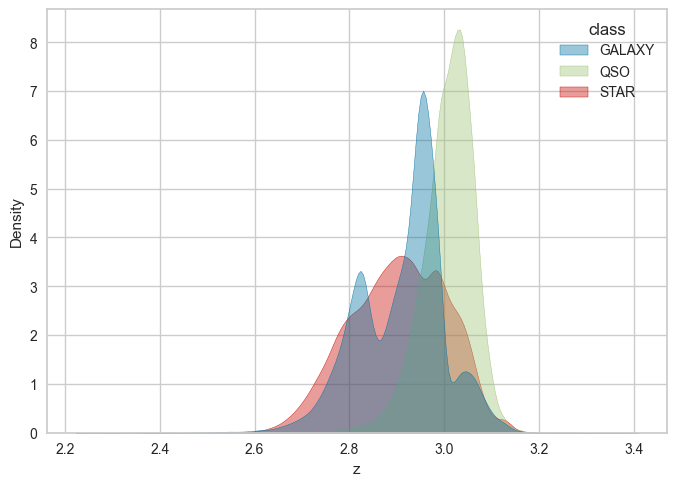

In [148]:
plotkdelog("z")

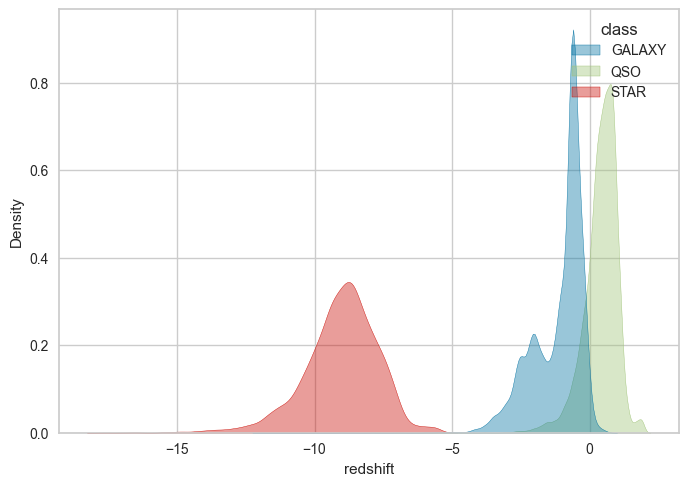

In [149]:
plotkdelog("redshift")

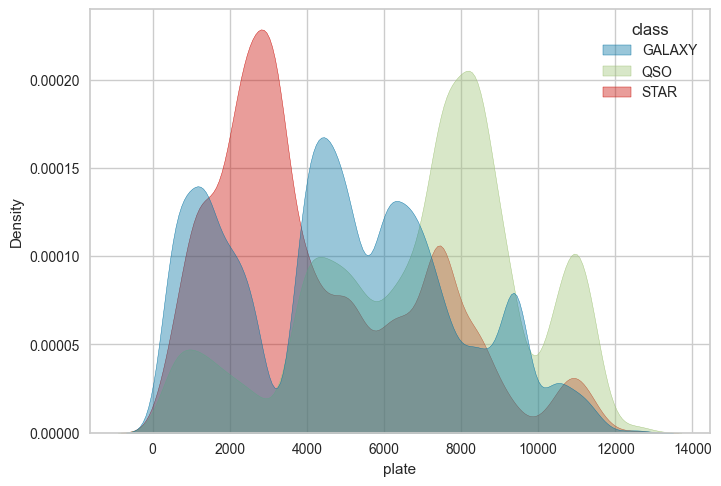

In [150]:
plotkde("plate")

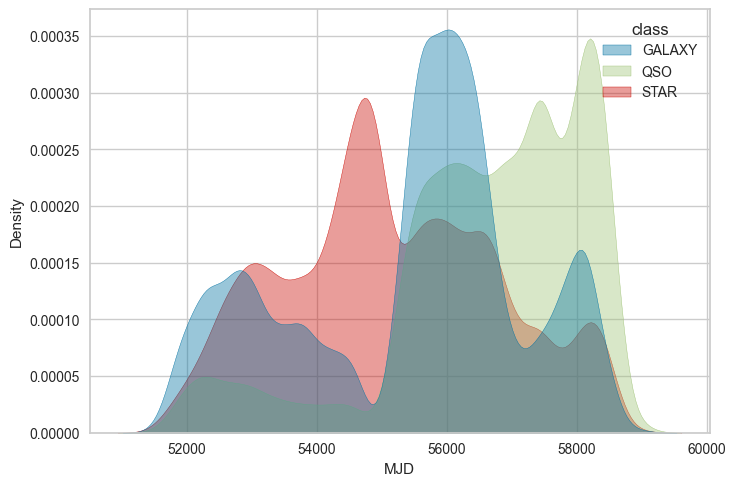

In [151]:
plotkde("MJD")

<Axes: xlabel='class', ylabel='count'>

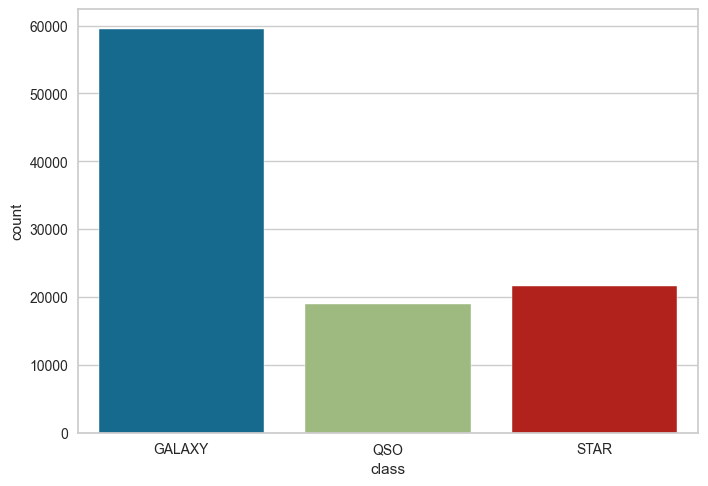

In [152]:
sns.countplot(x=df["class"])

The information presented through this simple count of the types of classes shows that we have an unbalanced dataset. During the next part (1b of the project) we will go through different methods to estimate a balance, or scale the data.

In [153]:
le = LabelEncoder()

In [154]:
dfModel = df.copy()

In [155]:
dfModel["class"] = le.fit_transform(dfModel["class"])
dfModel["class"] = dfModel["class"].astype(int)

In [156]:
dfModel["class"].dtype

dtype('int32')

# Citation


Abdurro’uf et al., The Seventeenth data release of the Sloan Digital Sky Surveys: Complete Release of MaNGA, MaStar and APOGEE-2 DATA (Abdurro’uf et al. 2022 ApJS 259, 35) [arXiv:2112.02026]

fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved June 2023 from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.